<a href="https://colab.research.google.com/github/JozefSL/pyNotes/blob/main/Prophet/US_mIndDemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##U.S. Natural Gas Industrial Consumption, Monthly Forecast with Prophet




In [ ]:
!pip install prophet
# about 90 seconds

In [2]:
import pandas as pd
import altair as alt
from prophet import Prophet

In [41]:
r = 'https://www.eia.gov/opendata/qb.php?sdid=NG.N3035US2.M'
data = pd.read_html(r)
#data is nested list of keys for a pandas series.
print(data[0][:].keys())
SeriesName = data[0]['Series Name'][0] # type of series
#Period = data[0]['Period'][:] # all the monthly time points
#Units = data[0]['Units'][:] # unit type
#Value = data[0]['Value'][:] # all the monthly values
df = data[0][['Period','Value']][:]

Index(['Series Name', 'Period', 'Frequency', 'Value', 'Units'], dtype='object')


In [43]:
df['Period']  = pd.to_datetime(df.Period, format='%Y%m', errors='coerce').dropna()
df.columns = ['ds','y']
df.head()

,ds,y
0,2022-02-01,715767
1,2022-01-01,809250
2,2021-12-01,765140
3,2021-11-01,721251
4,2021-10-01,669637


In [25]:
#df= df[df.ds > '2016-08-31']

In [44]:
df.tail()

,ds,y
249,2001-05-01,576532
250,2001-04-01,622054
251,2001-03-01,664918
252,2001-02-01,640026
253,2001-01-01,686540


In [45]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


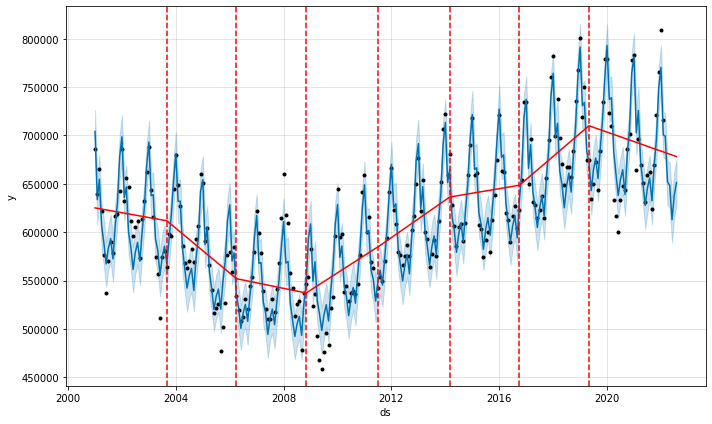

In [53]:
m = Prophet(n_changepoints=8, seasonality_mode='multiplicative',changepoint_prior_scale=8, changepoint_range=0.999, seasonality_prior_scale=15.95, weekly_seasonality=False).fit(df)
future = m.make_future_dataframe(periods=6, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

In [54]:
plot_components_plotly(m, fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


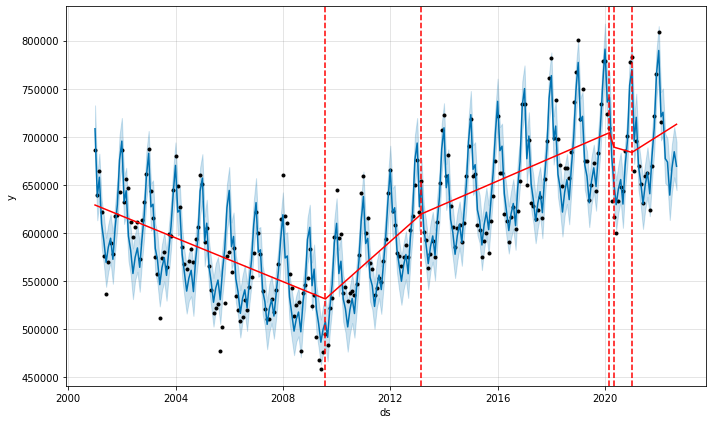

In [61]:
m = Prophet(changepoints=['2009-08-01', '2013-03-01', '2020-03-01', '2020-05-01', '2020-10-01', '2021-01-01'], seasonality_mode='multiplicative',changepoint_prior_scale=1.99, changepoint_range=0.08, seasonality_prior_scale=0.5).fit(df)
future = m.make_future_dataframe(periods=7, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

In [62]:
plot_components_plotly(m, fcst)

In [77]:
plot_plotly(m, fcst)
